In [ ]:
from keras import models
from keras import layers
import numpy as np
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),
input_shape=(28, 28, 1), activation='relu')) # relu는 음수는 전부 0으로 처리
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3),
activation='relu'))

In [ ]:
layers.Dropout(0.25) # 통상 25% ~ 50% 사용

In [ ]:
layers.Flatten() # 1D로 만듬

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import regularizers

model_bn = Sequential()
model_bn.add(Dense(64, use_bias=False, input_shape=(3,)))
model_bn.add(BatchNormalization())
model_bn.add(Dense(32, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape) # (50000, 32, 32, 3)
print(test_images.shape) # (10000, 32, 32, 3)
print(train_labels)
print(test_labels)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
print(train_labels[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
#Layer 쌓기
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 256)        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
metrics=['acc'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
391/391 [==============================] - 10s 12ms/step - loss: 1.8617 - acc: 0.3214 - val_loss: 1.5269 - val_acc: 0.4466
Epoch 2/10
391/391 [==============================] - 4s 9ms/step - loss: 1.4266 - acc: 0.4908 - val_loss: 1.2484 - val_acc: 0.5486
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.2070 - acc: 0.5752 - val_loss: 1.0670 - val_acc: 0.6185
Epoch 4/10
391/391 [==============================] - 3s 8ms/step - loss: 1.0384 - acc: 0.6398 - val_loss: 0.9984 - val_acc: 0.6470
Epoch 5/10
391/391 [==============================] - 4s 9ms/step - loss: 0.9028 - acc: 0.6875 - val_loss: 0.9652 - val_acc: 0.6676
Epoch 6/10
391/391 [==============================] - 4s 9ms/step - loss: 0.7943 - acc: 0.7259 - val_loss: 0.9220 - val_acc: 0.6960
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 0.6957 - acc: 0.7602 - val_loss: 0.8100 - val_acc: 0.7264
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8681 - acc: 0.7365
test_acc: 0.7365000247955322


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.3214400112628937, 0.49083998799324036, 0.575160026550293, 0.6397799849510193, 0.6874799728393555, 0.7258800268173218, 0.7601799964904785, 0.7893999814987183, 0.8185999989509583, 0.8448399901390076]


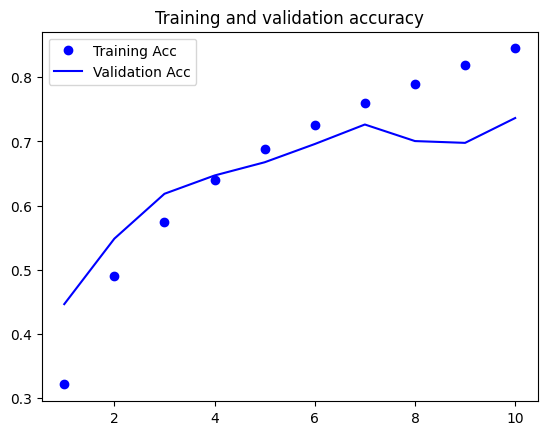

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

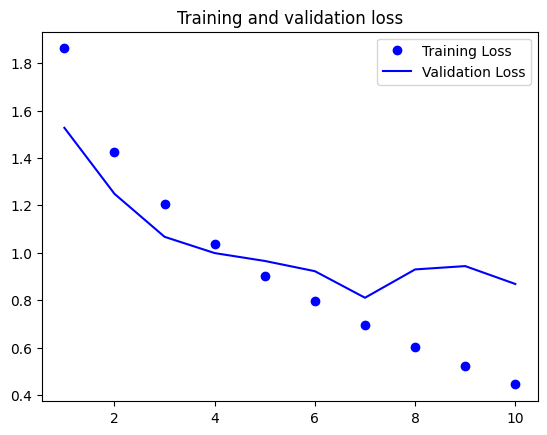

In [ ]:
plt.figure() # 새로운 그림을 그린다
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# 모델 저장
import os
os.chdir("/content/gdrive/MyDrive/pytest_img/models")
model.save("cifar10.h5")

Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%pwd

'/content/gdrive/MyDrive/pytest_img/models'

In [ ]:
model.save("cifar10.keras")

In [ ]:
# 모델 불러오기
from keras.models import load_model
loaded_model = load_model("cifar10.keras")

# 데이터 예측하기
predictions = loaded_model.predict(test_images)
print(predictions.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [ ]:
print(predictions[:10])

[[3.1670716e-05 4.1569137e-06 1.5677813e-03 9.8591596e-01 4.8814567e-05
  1.1697823e-02 6.7035720e-04 1.2025367e-05 4.9520433e-05 1.8617269e-06]
 [1.3255880e-03 1.1215025e-03 4.1628692e-08 5.0031570e-08 1.9703611e-08
  4.0792751e-09 1.6344277e-08 2.0437958e-09 9.9733526e-01 2.1742459e-04]
 [1.5526775e-01 3.8769905e-02 1.8795876e-02 1.2968335e-02 1.8077047e-03
  2.1719310e-02 6.5945378e-03 2.5713192e-03 6.7079121e-01 7.0714071e-02]
 [9.9277014e-01 4.7223653e-05 2.2940128e-03 1.7490184e-04 5.4394512e-04
  4.1604335e-06 5.3278063e-06 1.6967067e-05 4.0827822e-03 6.0397320e-05]
 [6.6801636e-07 2.9488079e-09 5.1026209e-04 7.1000803e-05 9.9009293e-01
  1.2203195e-04 9.2022624e-03 8.4675736e-07 2.5156428e-09 6.6939632e-09]
 [6.8999034e-05 2.1339270e-04 3.4414064e-02 8.7721892e-02 4.3831024e-04
  7.2174832e-02 8.0312794e-01 1.7332125e-03 2.3041050e-05 8.4258951e-05]
 [8.0841333e-02 2.5518841e-01 4.1777464e-03 1.3201267e-01 6.1742030e-05
  1.6908626e-01 1.1955113e-02 2.4622615e-04 5.1915972e-04 

In [ ]:
# 앞의 10개만 확인한다
# 열을 기준으로 최댓값의 인덱스를 추출한다
predicted_classes = np.argmax(predictions[:10], axis=1)
print("예측 결과:", predicted_classes)

예측 결과: [3 8 8 0 4 6 9 6 3 1]
